In [0]:
# !apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (111 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 133.1MB 80kB/s 
     |████████████████████████████████| 10.4MB 4.5MB/s 
     |████████████████████████████████| 225kB 38.0MB/s 
  Created wh

In [0]:
!pip install pyproj==1.9.6

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from itertools import groupby

import matplotlib.cm

from mpl_toolkits.basemap import Basemap

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np

import scipy.special
import random
import imageio

from mpl_toolkits.mplot3d import Axes3D  
from random import seed
from random import random
from scipy.stats import beta

Spatio-temporal

In [0]:
cluster_spatio_temporal_dict={ 'Assam': 0,
  'Meghalaya': 0,
  "ANDAMAN AND NICOBAR ISLANDS": 0,
  'Arunachal Pradesh': 0,
  'Nagaland': 0,
  'Manipur': 0,
  'Mizoram': 0,
  'Tripura': 0,
  'Sikkim': 0,
  'Goa': 0,
  'Kerala': 0,
  'Jammu And Kashmir': 1,
  'West Bengal': 1,
  'Orissa': 1,
  'Jharkhand': 1,
  'Bihar': 1,
  'Uttarakhand': 1,
  'Himachal Pradesh': 1,
  'Chhattisgarh': 1,
  'LAKSHADWEEP': 1,
  'Gujarat': 2,
  'Madhya Pradesh': 2,
  'Maharashtra': 2,
  'Andhra Pradesh': 2,
  'Karnataka': 3,
  'Tamil Nadu': 3,
  'Rajasthan': 4,
  'Uttar Pradesh': 4,
  'Haryana': 4,
  'Nct Of Delhi': 4,
  'CHANDIGARH': 4,
  'Punjab': 4,
}

In [0]:
cluster_spatio_temporal_df= pd.DataFrame(cluster_spatio_temporal_dict.items(),columns=['State', 'Cluster'])
cluster_spatio_temporal_df

,State,Cluster
0,Assam,0
1,Meghalaya,0
2,ANDAMAN AND NICOBAR ISLANDS,0
3,Arunachal Pradesh,0
4,Nagaland,0
5,Manipur,0
6,Mizoram,0
7,Tripura,0
8,Sikkim,0
9,Goa,0


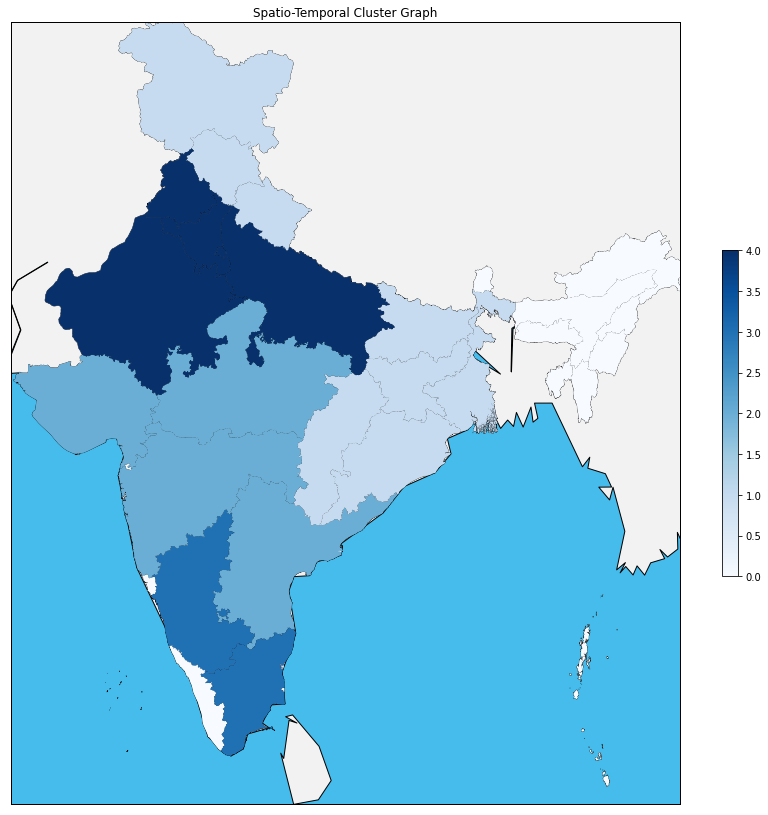

In [0]:
states_group = cluster_spatio_temporal_df.groupby(by = 'State')
sat_list = []
for key, group in states_group:
  sat = 0
  for row in group.iterrows():
    sat += row[1]['Cluster']
  sat_list.append((key,sat))

fig, ax = plt.subplots() 
m = Basemap(resolution='c', projection='merc', lat_0=54.5, lon_0=-4.36, llcrnrlon=68., llcrnrlat=6., urcrnrlon=97., urcrnrlat=37.)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('INDIA','INDIA')

satlist = []

for state_info in m.INDIA_info:
    state = state_info['ST_NAME']
    sat1 = 0
      
    for x in sat_list:
        if x[0] == state:
            sat1 = x[1]
            break
    satlist.append(sat1)
 
df_poly = pd.DataFrame({'shapes':[Polygon(np.array(shape), True) for shape in m.INDIA],
                        'area':[area['ST_NAME'] for area in m.INDIA_info],
                        'satlist': satlist})
      
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
cmap = plt.get_cmap('Blues')

pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['satlist'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(satlist)
plt.colorbar(mapper, shrink=0.4)

    # IMPORTANT ANIMATION CODE HERE
  # Used to keep the limits constant
  #ax.set_ylim(0, 15)

ax.set_title('Spatio-Temporal Cluster Graph')
plt.rcParams['figure.figsize'] = [15,15]
plt.show()


  


Temporal

In [0]:
cluster_temporal_dict={ 'Assam': 0,
  'Meghalaya': 0,
  'ANDAMAN AND NICOBAR ISLANDS': 0,
  'Arunachal Pradesh': 0,
  'Nagaland': 0,
  'Manipur': 0,
  'Mizoram': 0,
  'Tripura': 0,
  'Sikkim': 0,
  'Goa': 0,
  'Karnataka': 0,
  'Kerala': 0,
  'Jammu And Kashmir': 1,
  'West Bengal': 1,
  'Orissa': 1,
  'Jharkhand': 1,
  'Bihar': 1,
  'Uttarakhand': 1,
  'Himachal Pradesh': 1,
  'Madhya Pradesh': 1,
  'Chhattisgarh': 1,
  'LAKSHADWEEP': 1,
  'Gujarat': 2,
  'Uttar Pradesh': 2,
  'Maharashtra': 2,
  'Andhra Pradesh': 2,
  'Tamil Nadu': 2,
  'Karnataka': 3, 
  'Rajasthan': 4,
  'Haryana': 4,
  'Nct Of Delhi': 4,
  'CHANDIGARH': 4,
  'Punjab': 4
 }

In [0]:
cluster_temporal_df= pd.DataFrame(cluster_temporal_dict.items(),columns=['State', 'Cluster'])
cluster_temporal_df

,State,Cluster
0,Assam,0
1,Meghalaya,0
2,ANDAMAN AND NICOBAR ISLANDS,0
3,Arunachal Pradesh,0
4,Nagaland,0
5,Manipur,0
6,Mizoram,0
7,Tripura,0
8,Sikkim,0
9,Goa,0


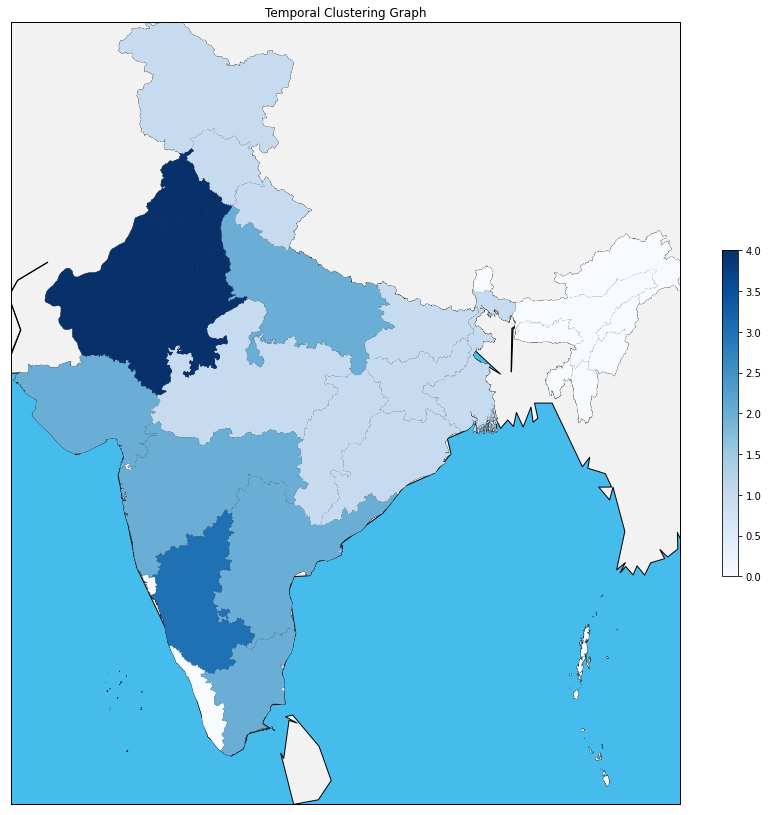

In [0]:
states_group = cluster_temporal_df.groupby(by = 'State')
sat_list = []

for key, group in states_group:
  sat = 0
  for row in group.iterrows():
    sat += row[1]['Cluster']
  sat_list.append((key,sat))

fig, ax = plt.subplots() 
m = Basemap(resolution='c', projection='merc', lat_0=54.5, lon_0=-4.36, llcrnrlon=68., llcrnrlat=6., urcrnrlon=97., urcrnrlat=37.)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('INDIA','INDIA')

satlist = []
for state_info in m.INDIA_info:
    state = state_info['ST_NAME']
    sat1 = 0
      
    for x in sat_list:
        if x[0] == state:
            sat1 = x[1]
            break
    satlist.append(sat1)
 
df_poly = pd.DataFrame({'shapes':[Polygon(np.array(shape), True) for shape in m.INDIA],
                        'area':[area['ST_NAME'] for area in m.INDIA_info],
                        'satlist': satlist})
      
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
cmap = plt.get_cmap('Blues')

pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['satlist'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(satlist)
plt.colorbar(mapper, shrink=0.4)

    # IMPORTANT ANIMATION CODE HERE
  # Used to keep the limits constant
  #ax.set_ylim(0, 15)

ax.set_title('Temporal Clustering Graph')
plt.rcParams['figure.figsize'] = [15,15]
plt.show()


  
